In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from IPython.display import Image
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.preprocessing import LabelEncoder

In [2]:
enf = pd.read_csv('encoding_finished_v2.csv')
enf= enf.drop(columns =['Unnamed: 0'], axis=1) #필요없는 컬럼 삭제
enf.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Attrition_Flag_Attrited Customer,new_income_category,new_edu_category,new_card_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,1.625,0.061,1,1,0,0,0,2,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,3.714,0.105,0,0,1,0,0,0,3,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,2.333,0.000,1,1,0,0,0,3,3,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,2.333,0.760,0,0,0,1,0,0,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,2.500,0.000,1,1,0,0,0,2,0,0


# 특성(x)과 타겟(y)분리

In [3]:
enf.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Attrition_Flag_Attrited Customer',
       'new_income_category', 'new_edu_category', 'new_card_category'],
      dtype='object')

In [5]:
y = enf['Attrition_Flag_Attrited Customer']
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag_Attrited Customer, Length: 10127, dtype: int64

In [6]:
x = enf[['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_M',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category']]
x.head(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,42,1.625,0.061,1,1,0,0,2,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,33,3.714,0.105,0,0,1,0,0,3,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,20,2.333,0.000,1,1,0,0,3,3,0


In [7]:
x.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category'],
      dtype='object')

# train, test 분리

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [9]:
x_train.shape, x_test.shape

((7088, 21), (3039, 21))

In [10]:
x_test.shape[0]/(x_train.shape[0]+x_test.shape[0])

0.3000888713340575

# 1. 로지스틱 회귀

In [11]:
from sklearn.linear_model import LogisticRegression

lgr =LogisticRegression()
lgr.fit(x_train, y_train)
lgr_ypred = lgr.predict(x_test)
lgr_yproba = lgr.predict_proba(x_test)

In [12]:
print('             분류 보고서')
print(classification_report(y_test, lgr_ypred))
print('정확도: ',accuracy_score(y_test, lgr_ypred))
print('재현율: ',recall_score(y_test, lgr_ypred))
print('정밀도: ',precision_score(y_test, lgr_ypred))
print('f1점수: ',f1_score(y_test, lgr_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, lgr_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2543
           1       0.72      0.46      0.56       496

    accuracy                           0.88      3039
   macro avg       0.81      0.71      0.75      3039
weighted avg       0.87      0.88      0.87      3039

정확도:  0.882856202698256
재현율:  0.4637096774193548
정밀도:  0.71875
f1점수:  0.5637254901960784
ROC-AUC점수:  0.7141592036329962


# 2.KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)
knn_ypred = knn_classifier.predict(x_test)
knn_yproba = knn_classifier.predict_proba(x_test)

In [14]:
print('             분류 보고서')
print(classification_report(y_test, knn_ypred)) 
print('정확도: ',accuracy_score(y_test, knn_ypred))
print('재현율: ',recall_score(y_test, knn_ypred))
print('정밀도: ',precision_score(y_test, knn_ypred))
print('f1점수: ',f1_score(y_test, knn_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, knn_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2543
           1       0.69      0.54      0.60       496

    accuracy                           0.88      3039
   macro avg       0.80      0.75      0.77      3039
weighted avg       0.88      0.88      0.88      3039

정확도:  0.8845014807502468
재현율:  0.5403225806451613
정밀도:  0.6854219948849105
f1점수:  0.6042841037204059
ROC-AUC점수:  0.7459772557177832


In [15]:
import matplotlib.pyplot as plt

k_list = range(1,20)
acc = [] #정확도를 저장할 리스트 초기화

for k in k_list:
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(x_train, y_train)
  acc.append(knn_classifier.score(x_test, y_test))#계산된 정확도를 차례로 저장

In [16]:
acc[:10]

[0.8716683119447186,
 0.8805528134254689,
 0.8838433695294505,
 0.8818690358670616,
 0.8845014807502468,
 0.8815399802566634,
 0.8802237578150708,
 0.8792365909838763,
 0.8798947022046726,
 0.8805528134254689]

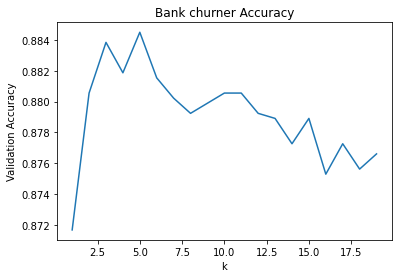

In [17]:
plt.plot(k_list, acc)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Bank churner Accuracy")
plt.show()

# 3.랜덤포레스트

In [18]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier(n_estimators=500, max_depth=4,random_state=0) 
rt.fit(x_train, y_train)
rt_ypred=rt.predict(x_test)
rt_yproba=rt.predict_proba(x_test)

In [19]:
print('             분류 보고서')
print(classification_report(y_test, rt_ypred))
print('정확도: ',accuracy_score(y_test, rt_ypred))
print('재현율: ',recall_score(y_test, rt_ypred))
print('정밀도: ',precision_score(y_test, rt_ypred))
print('f1점수: ',f1_score(y_test, rt_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, rt_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2543
           1       0.92      0.44      0.59       496

    accuracy                           0.90      3039
   macro avg       0.91      0.71      0.77      3039
weighted avg       0.90      0.90      0.89      3039

정확도:  0.9012833168805529
재현율:  0.43548387096774194
정밀도:  0.9152542372881356
f1점수:  0.5901639344262295
ROC-AUC점수:  0.7138095721334974


In [20]:
columns = x_train.columns

# 특성 중요도  # columns = iris.feature_names임을 상기하라
feature_importance = pd.DataFrame(rt.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.008492,0.000929,0.002994,0.05579,0.020985,0.023878,0.018141,0.156265,0.009003,0.033299,...,0.209025,0.152486,0.095413,0.008467,0.001067,0.000319,0.000068,0.00054,0.000396,0.000198


In [21]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,0.209025
Total_Trans_Amt,0.202243
Total_Revolving_Bal,0.156265
Total_Ct_Chng_Q4_Q1,0.152486
Avg_Utilization_Ratio,0.095413


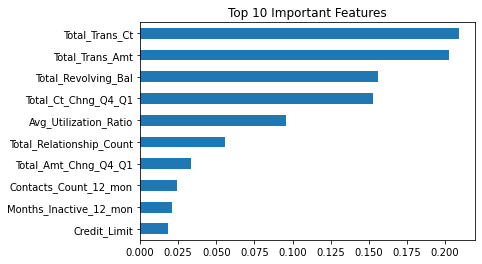

In [22]:
feat_importances = pd.Series(rt.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 4.서포트 벡터 머신

In [23]:
from sklearn.svm import SVC

svc = SVC(C = 1.0, kernel = 'rbf', probability=True)
svc.fit(x_train, y_train)
svc_ypred=svc.predict(x_test)
svc_yproba=svc.predict_proba(x_test)

In [24]:
print('             분류 보고서')
print(classification_report(y_test, svc_ypred))
print('정확도: ',accuracy_score(y_test, svc_ypred))
print('재현율: ',recall_score(y_test, svc_ypred))
print('정밀도: ',precision_score(y_test, svc_ypred))
print('f1점수: ',f1_score(y_test, svc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, svc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2543
           1       0.00      0.00      0.00       496

    accuracy                           0.84      3039
   macro avg       0.42      0.50      0.46      3039
weighted avg       0.70      0.84      0.76      3039

정확도:  0.836788417242514
재현율:  0.0
정밀도:  0.0
f1점수:  0.0
ROC-AUC점수:  0.5


# 5.나이브 베이즈

In [25]:
# 가우시안 나이브 베이즈
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(x_train, y_train)
gnb_ypred=gnb.predict(x_test)
gnb_yproba=gnb.predict_proba(x_test)

In [26]:
print('             분류 보고서')
print(classification_report(y_test, gnb_ypred))
print('정확도: ',accuracy_score(y_test, gnb_ypred))
print('재현율: ',recall_score(y_test, gnb_ypred))
print('정밀도: ',precision_score(y_test, gnb_ypred))
print('f1점수: ',f1_score(y_test, gnb_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, gnb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2543
           1       0.67      0.59      0.62       496

    accuracy                           0.88      3039
   macro avg       0.79      0.76      0.78      3039
weighted avg       0.88      0.88      0.88      3039

정확도:  0.8845014807502468
재현율:  0.5866935483870968
정밀도:  0.665903890160183
f1점수:  0.6237942122186495
ROC-AUC점수:  0.7646405217358213


In [27]:
# 다항분포 나이브 베이즈
from sklearn.naive_bayes import MultinomialNB

Mnb = MultinomialNB()
Mnb.fit(x_train, y_train)
mnb_ypred=Mnb.predict(x_test)
mnb_yproba=Mnb.predict_proba(x_test)

In [28]:
print('             분류 보고서')
print(classification_report(y_test, mnb_ypred))
print('정확도: ',accuracy_score(y_test, mnb_ypred))
print('재현율: ',recall_score(y_test, mnb_ypred))
print('정밀도: ',precision_score(y_test, mnb_ypred))
print('f1점수: ',f1_score(y_test, mnb_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, mnb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      2543
           1       0.22      0.44      0.30       496

    accuracy                           0.66      3039
   macro avg       0.54      0.57      0.53      3039
weighted avg       0.76      0.66      0.70      3039

정확도:  0.6587693320171109
재현율:  0.4375
정밀도:  0.22256410256410256
f1점수:  0.29503738953093134
ROC-AUC점수:  0.5697134290208415


# 6.신경망 MLP 분류

In [29]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver = 'adam', hidden_layer_sizes = (4, 4), learning_rate_init = 0.1)
mlp.fit(x_train, y_train)
mlp_ypred = mlp.predict(x_test)
mlp_yproba=mlp.predict_proba(x_test)

In [30]:
print('             분류 보고서')
print(classification_report(y_test, mlp_ypred))
print('정확도: ',accuracy_score(y_test, mlp_ypred))
print('재현율: ',recall_score(y_test, mlp_ypred))
print('정밀도: ',precision_score(y_test, mlp_ypred))
print('f1점수: ',f1_score(y_test, mlp_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, mlp_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2543
           1       0.00      0.00      0.00       496

    accuracy                           0.84      3039
   macro avg       0.42      0.50      0.46      3039
weighted avg       0.70      0.84      0.76      3039

정확도:  0.836788417242514
재현율:  0.0
정밀도:  0.0
f1점수:  0.0
ROC-AUC점수:  0.5


# 7.Gradient Boosting Classifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0,learning_rate=0.5)
gbc.fit(x_train,y_train)
gbc_ypred=gbc.predict(x_test)
gbc_yproba=gbc.predict_proba(x_test)

In [32]:
print('             분류 보고서')
print(classification_report(y_test,gbc_ypred))
print('정확도: ',accuracy_score(y_test, gbc_ypred))
print('재현율: ',recall_score(y_test, gbc_ypred))
print('정밀도: ',precision_score(y_test, gbc_ypred))
print('f1점수: ',f1_score(y_test, gbc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, gbc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2543
           1       0.92      0.89      0.90       496

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9693978282329714
재현율:  0.8870967741935484
정밀도:  0.9224318658280922
f1점수:  0.9044193216855086
ROC-AUC점수:  0.9362735148985831


0.9926426750218817


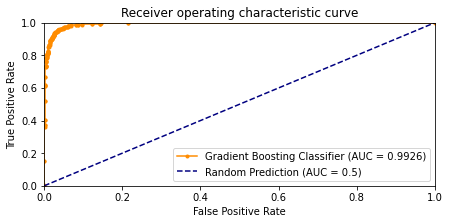

In [80]:
# ROC 곡선과 AUC의 계산
gbc_Q = gbc.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, gbc_Q)
print(roc_auc)

fpr, tpr, _ = roc_curve(y_test, gbc_Q)
# 그래프
plt.figure(figsize=(7,3))
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Gradient Boosting Classifier (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show() 

In [84]:
#!pip install yellowbrick

yellow brick roc auc 시각화 예시) 

from yellowbrick.classifier import ROCAUC

#Instantiate the visualizer with the classification model  
model = LogisticRegression(multi_class="auto", solver="liblinear")  
visualizer = ROCAUC(model, classes=["not_spam", "is_spam"])  

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer  
visualizer.score(X_test, y_test)        # Evaluate the model on the test data  
visualizer.show()                       # Finalize and show the figure  

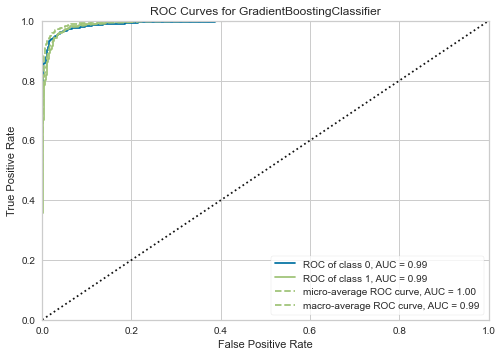

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [87]:
from yellowbrick.classifier import ROCAUC
gbc_visualizer = ROCAUC(gbc, classes=[0, 1])  

gbc_visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer  
gbc_visualizer.score(x_test, y_test)        # Evaluate the model on the test data  
gbc_visualizer.show()                       # Finalize and show the figure  

In [33]:
columns = x_train.columns

feature_importance = pd.DataFrame(gbc.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.0184,0.000717,0.002717,0.079492,0.010013,0.016839,0.003539,0.189779,0.009805,0.036065,...,0.346777,0.082224,0.003819,0.000747,0.00182,0.00005,0.000189,0.000549,0.001734,0.0


In [34]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,0.346777
Total_Trans_Amt,0.194725
Total_Revolving_Bal,0.189779
Total_Ct_Chng_Q4_Q1,0.082224
Total_Relationship_Count,0.079492


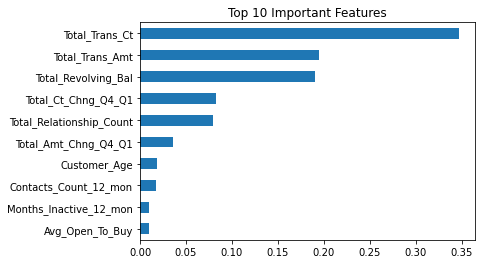

In [35]:
feat_importances = pd.Series(gbc.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 8.XGBoost classifier

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=500, learning_rate=1.0, max_depth =4)
xgb.fit(x_train, y_train)
xgb_ypred = xgb.predict(x_test)
xgb_yproba = xgb.predict_proba(x_test)

[18:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
print('             분류 보고서')
print(classification_report(y_test, xgb_ypred))
print('정확도: ',accuracy_score(y_test, xgb_ypred)) 
print('재현율: ',recall_score(y_test,  xgb_ypred))
print('정밀도: ',precision_score(y_test,  xgb_ypred))
print('f1점수: ',f1_score(y_test,  xgb_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, xgb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.89      0.89      0.89       496

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9651201052977953
재현율:  0.8931451612903226
정밀도:  0.8931451612903226
f1점수:  0.8931451612903226
ROC-AUC점수:  0.9361518177666713


0.9910950997678636


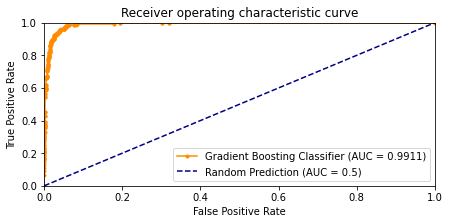

In [81]:
# ROC 곡선과 AUC의 계산
xgb_Q = xgb.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, xgb_Q)
print(roc_auc)

fpr, tpr, _ = roc_curve(y_test, xgb_Q)
# 그래프
plt.figure(figsize=(7,3))
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Gradient Boosting Classifier (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show() 

In [38]:
columns = x_train.columns

feature_importance = pd.DataFrame(xgb.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.034004,0.011509,0.014365,0.146423,0.07735,0.05099,0.019263,0.146235,0.010699,0.034397,...,0.22117,0.055214,0.009926,0.019697,0.015639,0.005338,0.02236,0.00899,0.010633,0.007575


In [39]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,0.221170
Total_Relationship_Count,0.146423
Total_Revolving_Bal,0.146235
Total_Trans_Amt,0.078223
Months_Inactive_12_mon,0.077350


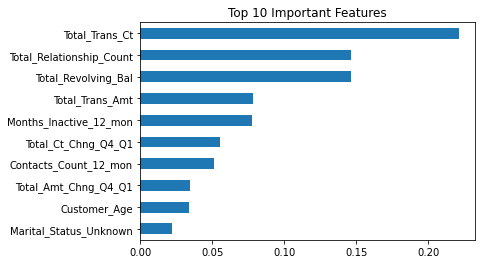

In [40]:
feat_importances = pd.Series(xgb.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 9.LightGBM

In [41]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=400)
lgbm.fit(x_train, y_train)
lgbm_ypred = lgbm.predict(x_test)
lgbm_yproba = lgbm.predict_proba(x_test)

In [42]:
print('             분류 보고서')
print(classification_report(y_test, lgbm_ypred))
print('정확도: ',accuracy_score(y_test, lgbm_ypred)) 
print('재현율: ',recall_score(y_test,  lgbm_ypred))
print('정밀도: ',precision_score(y_test,  lgbm_ypred))
print('f1점수: ',f1_score(y_test,  lgbm_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, lgbm_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.91      0.89      0.90       496

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9687397170121751
재현율:  0.8931451612903226
정밀도:  0.9134020618556701
f1점수:  0.9031600407747197
ROC-AUC점수:  0.9383146176093767


0.99418549338475


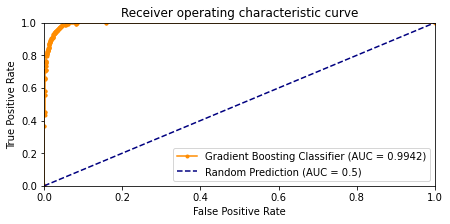

In [82]:
# ROC 곡선과 AUC의 계산
lgbm_Q = lgbm.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, lgbm_Q)
print(roc_auc)

fpr, tpr, _ = roc_curve(y_test, lgbm_Q)
# 그래프
plt.figure(figsize=(7,3))
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Gradient Boosting Classifier (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show() 

In [43]:
columns = x_train.columns
feature_importance = pd.DataFrame(lgbm.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,859,205,604,527,337,377,640,679,503,1463,...,1226,1108,349,120,132,73,49,165,239,15


In [44]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Amt,2330
Total_Amt_Chng_Q4_Q1,1463
Total_Trans_Ct,1226
Total_Ct_Chng_Q4_Q1,1108
Customer_Age,859


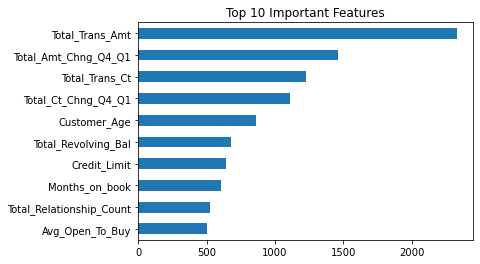

In [45]:
feat_importances = pd.Series(lgbm.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 10.catboost

In [46]:
from catboost import CatBoostClassifier, Pool

cbc = CatBoostClassifier()
cbc.fit(x_train, y_train)
cbc_ypred = cbc.predict(x_test)
cbc_yproba = cbc.predict_proba(x_test)

Learning rate set to 0.023774
0:	learn: 0.6593964	total: 170ms	remaining: 2m 50s
1:	learn: 0.6310265	total: 186ms	remaining: 1m 32s
2:	learn: 0.6030996	total: 197ms	remaining: 1m 5s
3:	learn: 0.5760449	total: 207ms	remaining: 51.4s
4:	learn: 0.5514639	total: 215ms	remaining: 42.7s
5:	learn: 0.5308499	total: 221ms	remaining: 36.7s
6:	learn: 0.5097667	total: 228ms	remaining: 32.4s
7:	learn: 0.4904607	total: 237ms	remaining: 29.4s
8:	learn: 0.4717865	total: 245ms	remaining: 27s
9:	learn: 0.4561123	total: 252ms	remaining: 24.9s
10:	learn: 0.4404298	total: 258ms	remaining: 23.2s
11:	learn: 0.4258466	total: 265ms	remaining: 21.8s
12:	learn: 0.4129611	total: 271ms	remaining: 20.6s
13:	learn: 0.3987729	total: 277ms	remaining: 19.5s
14:	learn: 0.3884618	total: 282ms	remaining: 18.5s
15:	learn: 0.3764435	total: 287ms	remaining: 17.6s
16:	learn: 0.3661287	total: 292ms	remaining: 16.9s
17:	learn: 0.3512598	total: 297ms	remaining: 16.2s
18:	learn: 0.3460445	total: 303ms	remaining: 15.6s
19:	learn: 

175:	learn: 0.0983303	total: 1.21s	remaining: 5.65s
176:	learn: 0.0980891	total: 1.21s	remaining: 5.64s
177:	learn: 0.0977123	total: 1.22s	remaining: 5.64s
178:	learn: 0.0973905	total: 1.23s	remaining: 5.63s
179:	learn: 0.0969536	total: 1.23s	remaining: 5.62s
180:	learn: 0.0963983	total: 1.24s	remaining: 5.6s
181:	learn: 0.0961493	total: 1.24s	remaining: 5.59s
182:	learn: 0.0959197	total: 1.25s	remaining: 5.58s
183:	learn: 0.0956470	total: 1.25s	remaining: 5.56s
184:	learn: 0.0953859	total: 1.26s	remaining: 5.55s
185:	learn: 0.0949158	total: 1.26s	remaining: 5.54s
186:	learn: 0.0946579	total: 1.27s	remaining: 5.52s
187:	learn: 0.0941780	total: 1.28s	remaining: 5.51s
188:	learn: 0.0938079	total: 1.28s	remaining: 5.5s
189:	learn: 0.0935817	total: 1.29s	remaining: 5.49s
190:	learn: 0.0933605	total: 1.29s	remaining: 5.47s
191:	learn: 0.0927910	total: 1.3s	remaining: 5.46s
192:	learn: 0.0923955	total: 1.3s	remaining: 5.45s
193:	learn: 0.0920641	total: 1.31s	remaining: 5.44s
194:	learn: 0.09

351:	learn: 0.0635802	total: 2.25s	remaining: 4.14s
352:	learn: 0.0634825	total: 2.26s	remaining: 4.14s
353:	learn: 0.0633440	total: 2.26s	remaining: 4.13s
354:	learn: 0.0632138	total: 2.27s	remaining: 4.13s
355:	learn: 0.0631112	total: 2.28s	remaining: 4.13s
356:	learn: 0.0630018	total: 2.29s	remaining: 4.12s
357:	learn: 0.0627780	total: 2.29s	remaining: 4.11s
358:	learn: 0.0627147	total: 2.3s	remaining: 4.1s
359:	learn: 0.0625559	total: 2.31s	remaining: 4.1s
360:	learn: 0.0624117	total: 2.31s	remaining: 4.09s
361:	learn: 0.0622953	total: 2.32s	remaining: 4.09s
362:	learn: 0.0622511	total: 2.33s	remaining: 4.09s
363:	learn: 0.0621395	total: 2.33s	remaining: 4.08s
364:	learn: 0.0619981	total: 2.34s	remaining: 4.08s
365:	learn: 0.0619077	total: 2.35s	remaining: 4.07s
366:	learn: 0.0617643	total: 2.35s	remaining: 4.06s
367:	learn: 0.0615819	total: 2.36s	remaining: 4.05s
368:	learn: 0.0614582	total: 2.37s	remaining: 4.05s
369:	learn: 0.0612994	total: 2.38s	remaining: 4.04s
370:	learn: 0.0

513:	learn: 0.0473767	total: 3.29s	remaining: 3.11s
514:	learn: 0.0472665	total: 3.3s	remaining: 3.11s
515:	learn: 0.0471576	total: 3.31s	remaining: 3.1s
516:	learn: 0.0470652	total: 3.31s	remaining: 3.1s
517:	learn: 0.0469500	total: 3.32s	remaining: 3.09s
518:	learn: 0.0468919	total: 3.32s	remaining: 3.08s
519:	learn: 0.0467893	total: 3.33s	remaining: 3.07s
520:	learn: 0.0467002	total: 3.33s	remaining: 3.07s
521:	learn: 0.0466580	total: 3.34s	remaining: 3.06s
522:	learn: 0.0465782	total: 3.35s	remaining: 3.05s
523:	learn: 0.0464532	total: 3.35s	remaining: 3.04s
524:	learn: 0.0463776	total: 3.35s	remaining: 3.04s
525:	learn: 0.0462887	total: 3.36s	remaining: 3.03s
526:	learn: 0.0462170	total: 3.37s	remaining: 3.02s
527:	learn: 0.0460989	total: 3.37s	remaining: 3.01s
528:	learn: 0.0459982	total: 3.38s	remaining: 3s
529:	learn: 0.0459058	total: 3.38s	remaining: 3s
530:	learn: 0.0458171	total: 3.39s	remaining: 2.99s
531:	learn: 0.0457828	total: 3.39s	remaining: 2.98s
532:	learn: 0.0456902

688:	learn: 0.0362782	total: 4.33s	remaining: 1.95s
689:	learn: 0.0362232	total: 4.33s	remaining: 1.95s
690:	learn: 0.0361560	total: 4.34s	remaining: 1.94s
691:	learn: 0.0361000	total: 4.35s	remaining: 1.94s
692:	learn: 0.0360358	total: 4.36s	remaining: 1.93s
693:	learn: 0.0359957	total: 4.36s	remaining: 1.92s
694:	learn: 0.0359322	total: 4.37s	remaining: 1.92s
695:	learn: 0.0358743	total: 4.38s	remaining: 1.91s
696:	learn: 0.0358085	total: 4.38s	remaining: 1.9s
697:	learn: 0.0357524	total: 4.39s	remaining: 1.9s
698:	learn: 0.0357267	total: 4.39s	remaining: 1.89s
699:	learn: 0.0357015	total: 4.4s	remaining: 1.88s
700:	learn: 0.0356600	total: 4.4s	remaining: 1.88s
701:	learn: 0.0356220	total: 4.41s	remaining: 1.87s
702:	learn: 0.0355465	total: 4.41s	remaining: 1.86s
703:	learn: 0.0354812	total: 4.42s	remaining: 1.86s
704:	learn: 0.0353996	total: 4.42s	remaining: 1.85s
705:	learn: 0.0353694	total: 4.43s	remaining: 1.84s
706:	learn: 0.0353071	total: 4.43s	remaining: 1.84s
707:	learn: 0.03

868:	learn: 0.0283793	total: 5.36s	remaining: 808ms
869:	learn: 0.0283533	total: 5.37s	remaining: 802ms
870:	learn: 0.0283153	total: 5.37s	remaining: 796ms
871:	learn: 0.0282843	total: 5.38s	remaining: 790ms
872:	learn: 0.0282349	total: 5.38s	remaining: 783ms
873:	learn: 0.0282239	total: 5.39s	remaining: 777ms
874:	learn: 0.0282101	total: 5.39s	remaining: 771ms
875:	learn: 0.0281897	total: 5.4s	remaining: 764ms
876:	learn: 0.0281492	total: 5.41s	remaining: 758ms
877:	learn: 0.0281103	total: 5.41s	remaining: 752ms
878:	learn: 0.0280441	total: 5.42s	remaining: 746ms
879:	learn: 0.0280094	total: 5.42s	remaining: 739ms
880:	learn: 0.0279544	total: 5.42s	remaining: 733ms
881:	learn: 0.0279257	total: 5.43s	remaining: 727ms
882:	learn: 0.0279051	total: 5.44s	remaining: 720ms
883:	learn: 0.0278749	total: 5.44s	remaining: 714ms
884:	learn: 0.0278414	total: 5.45s	remaining: 708ms
885:	learn: 0.0278176	total: 5.45s	remaining: 701ms
886:	learn: 0.0277708	total: 5.46s	remaining: 695ms
887:	learn: 0

In [47]:
print('             분류 보고서')
print(classification_report(y_test, cbc_ypred))
print('정확도: ',accuracy_score(y_test, cbc_ypred)) 
print('재현율: ',recall_score(y_test,  cbc_ypred))
print('정밀도: ',precision_score(y_test,  cbc_ypred))
print('f1점수: ',f1_score(y_test,  cbc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, cbc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.91      0.90      0.90       496

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9684106614017769
재현율:  0.8951612903225806
정밀도:  0.9098360655737705
f1점수:  0.9024390243902438
ROC-AUC점수:  0.9389294457904683


0.9942972803267667


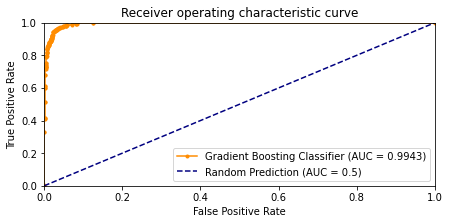

In [83]:
# ROC 곡선과 AUC의 계산
cbc_Q = cbc.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, cbc_Q)
print(roc_auc)

fpr, tpr, _ = roc_curve(y_test, cbc_Q)
# 그래프
plt.figure(figsize=(7,3))
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Gradient Boosting Classifier (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show() 

In [48]:
columns = x_train.columns
feature_importance = pd.DataFrame(cbc.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,3.17889,0.418323,1.497357,4.820217,2.903648,1.870492,4.445777,5.849693,1.567708,7.441033,...,28.987037,5.491216,1.752732,0.788604,0.719793,0.165848,0.105384,0.196667,0.398696,0.0672


In [49]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,28.987037
Total_Trans_Amt,27.333687
Total_Amt_Chng_Q4_Q1,7.441033
Total_Revolving_Bal,5.849693
Total_Ct_Chng_Q4_Q1,5.491216


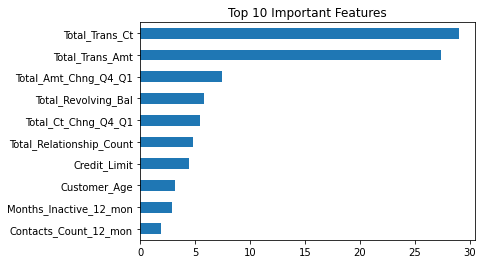

In [50]:
feat_importances = pd.Series(cbc.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 각 모델별 점수 비교

In [51]:
Comparison = pd.DataFrame({'LogReg':[accuracy_score(y_test, lgr_ypred),recall_score(y_test,  lgr_ypred),precision_score(y_test,  lgr_ypred),f1_score(y_test,  lgr_ypred),roc_auc_score(y_test, lgr_ypred)],
'KNN':[accuracy_score(y_test, knn_ypred),recall_score(y_test,  knn_ypred),precision_score(y_test,  knn_ypred),f1_score(y_test,  knn_ypred),roc_auc_score(y_test, knn_ypred)],
'RandFor':[accuracy_score(y_test, rt_ypred),recall_score(y_test,  rt_ypred),precision_score(y_test,  rt_ypred),f1_score(y_test,  rt_ypred),roc_auc_score(y_test, rt_ypred)],    
'SVM':[accuracy_score(y_test, svc_ypred),recall_score(y_test,  svc_ypred),precision_score(y_test,  svc_ypred),f1_score(y_test,  svc_ypred),roc_auc_score(y_test, svc_ypred)],
'GNB':[accuracy_score(y_test, gnb_ypred),recall_score(y_test,  gnb_ypred),precision_score(y_test,  gnb_ypred),f1_score(y_test,  gnb_ypred),roc_auc_score(y_test, gnb_ypred)],
"MNB":[accuracy_score(y_test, mnb_ypred),recall_score(y_test,  mnb_ypred),precision_score(y_test,  mnb_ypred),f1_score(y_test,  mnb_ypred),roc_auc_score(y_test, mnb_ypred)],
"MLP":[accuracy_score(y_test, mlp_ypred),recall_score(y_test,  mlp_ypred),precision_score(y_test,  mlp_ypred),f1_score(y_test,  mlp_ypred),roc_auc_score(y_test, mlp_ypred)],
"GradBoost":[accuracy_score(y_test, gbc_ypred),recall_score(y_test,  gbc_ypred),precision_score(y_test,  gbc_ypred),f1_score(y_test,  gbc_ypred),roc_auc_score(y_test, gbc_ypred)],
"XGBoost":[accuracy_score(y_test, xgb_ypred),recall_score(y_test,  xgb_ypred),precision_score(y_test,  xgb_ypred),f1_score(y_test,  xgb_ypred),roc_auc_score(y_test, xgb_ypred)],
"LightGBM":[accuracy_score(y_test, lgbm_ypred),recall_score(y_test,  lgbm_ypred),precision_score(y_test,  lgbm_ypred),f1_score(y_test,  lgbm_ypred),roc_auc_score(y_test, lgbm_ypred)],
'CatBoost':[accuracy_score(y_test, cbc_ypred),recall_score(y_test,  cbc_ypred),precision_score(y_test,  cbc_ypred),f1_score(y_test,  cbc_ypred),roc_auc_score(y_test, cbc_ypred)]},
                          index = ['ACC', 'Recall', 'Precision', 'F1', 'ROC-AUC'])
Comparison

,LogReg,KNN,RandFor,SVM,GNB,MNB,MLP,GradBoost,XGBoost,LightGBM,CatBoost
ACC,0.882856,0.884501,0.901283,0.836788,0.884501,0.658769,0.836788,0.969398,0.965120,0.968740,0.968411
Recall,0.463710,0.540323,0.435484,0.000000,0.586694,0.437500,0.000000,0.887097,0.893145,0.893145,0.895161
Precision,0.718750,0.685422,0.915254,0.000000,0.665904,0.222564,0.000000,0.922432,0.893145,0.913402,0.909836
F1,0.563725,0.604284,0.590164,0.000000,0.623794,0.295037,0.000000,0.904419,0.893145,0.903160,0.902439
ROC-AUC,0.714159,0.745977,0.713810,0.500000,0.764641,0.569713,0.500000,0.936274,0.936152,0.938315,0.938929


In [52]:
Comparison.max(axis=1)

ACC          0.969398
Recall       0.895161
Precision    0.922432
F1           0.904419
ROC-AUC      0.938929
dtype: float64

In [53]:
result = Comparison.max(axis=1)
result.index = Comparison.idxmax(axis=1)
result.index

Index(['GradBoost', 'CatBoost', 'GradBoost', 'GradBoost', 'CatBoost'], dtype='object')

In [54]:
top4 = Comparison[['GradBoost', 'XGBoost', 'LightGBM', 'CatBoost']]
top4

,GradBoost,XGBoost,LightGBM,CatBoost
ACC,0.969398,0.965120,0.968740,0.968411
Recall,0.887097,0.893145,0.893145,0.895161
Precision,0.922432,0.893145,0.913402,0.909836
F1,0.904419,0.893145,0.903160,0.902439
ROC-AUC,0.936274,0.936152,0.938315,0.938929


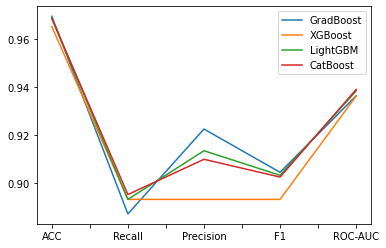

In [55]:
top4.plot()
plt.show()

# Top4 모델별 Feature importance 비교

In [56]:
# Gradient Boosting Classifier
grad_df = pd.DataFrame(gbc.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
grad_dft = grad_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()
grad_dft

,feature_importance
Total_Trans_Ct,0.346777
Total_Trans_Amt,0.194725
Total_Revolving_Bal,0.189779
Total_Ct_Chng_Q4_Q1,0.082224
Total_Relationship_Count,0.079492


In [57]:
# XGbBoost
xgboost_df = pd.DataFrame(xgb.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
xgboost_dft = xgboost_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()
xgboost_dft

,feature_importance
Total_Trans_Ct,0.221170
Total_Relationship_Count,0.146423
Total_Revolving_Bal,0.146235
Total_Trans_Amt,0.078223
Months_Inactive_12_mon,0.077350


In [58]:
# LightGBM
lightgbm_df = pd.DataFrame(lgbm.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
lightgbm_dft = lightgbm_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()
lightgbm_dft

,feature_importance
Total_Trans_Amt,2330
Total_Amt_Chng_Q4_Q1,1463
Total_Trans_Ct,1226
Total_Ct_Chng_Q4_Q1,1108
Customer_Age,859


In [59]:
# CatBoost
cat_df = pd.DataFrame(cbc.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
cat_dft = cat_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()
cat_dft

,feature_importance
Total_Trans_Ct,28.987037
Total_Trans_Amt,27.333687
Total_Amt_Chng_Q4_Q1,7.441033
Total_Revolving_Bal,5.849693
Total_Ct_Chng_Q4_Q1,5.491216


In [60]:
freq = pd.concat([grad_dft, xgboost_dft, lightgbm_dft, cat_dft])
freq

,feature_importance
Total_Trans_Ct,0.346777
Total_Trans_Amt,0.194725
Total_Revolving_Bal,0.189779
Total_Ct_Chng_Q4_Q1,0.082224
Total_Relationship_Count,0.079492
Total_Trans_Ct,0.221170
Total_Relationship_Count,0.146423
Total_Revolving_Bal,0.146235
Total_Trans_Amt,0.078223
Months_Inactive_12_mon,0.077350


In [72]:
# feature importance가 높게 나온 특성들
freq.index.value_counts()

Total_Trans_Ct              4
Total_Trans_Amt             4
Total_Revolving_Bal         3
Total_Ct_Chng_Q4_Q1         3
Total_Relationship_Count    2
Total_Amt_Chng_Q4_Q1        2
Months_Inactive_12_mon      1
Customer_Age                1
dtype: int64